What is the purpose of our web app we're developing? 
Were creating a webb app to view the inventory of a car delership in an interactive way. 

Lets start with importing and analying the data 

\

In [49]:
%matplotlib inline

In [50]:
import pandas as pd
import numpy as np 
import streamlit as st
import plotly.express as px
import altair as al 
import matplotlib.pyplot as plt
plt.ion()


In [ ]:
#importing, dropping duplicated, and printing a small sample 
car_ad_df = pd.read_csv("vehicles_us.csv")

car_ad_df = car_ad_df.drop_duplicates()


print(car_ad_df.sample(5))



       price  model_year                        model  condition  cylinders  \
24897  29980      2016.0      jeep wrangler unlimited  excellent        6.0   
4653    6000      1995.0                jeep wrangler       fair        4.0   
7601    5500      1990.0                     ram 3500       good        6.0   
16712  29875      2018.0  ford f150 supercrew cab xlt   like new        6.0   
4466   14995      2011.0                  ford ranger  excellent        6.0   

         fuel  odometer transmission         type paint_color  is_4wd  \
24897     gas       NaN    automatic  convertible       white     1.0   
4653      gas  129450.0       manual          SUV         NaN     1.0   
7601   diesel  206191.0       manual        truck       brown     NaN   
16712   other   11132.0    automatic        truck        blue     1.0   
4466      gas       NaN    automatic        truck        grey     1.0   

      date_posted  days_listed  
24897  2018-08-27           29  
4653   2019-01-24   

In [52]:
#checking to see how many Nan values are present in database
print(car_ad_df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


#Has quite a bit of missing values in severeal differnet columns 
#Dont want to erase the extire row or column as there may be important information in the associated row or columns 
#for all the numerical columns ill be replaceing the 'Nan' value with 0, and for the string column/s I'll be replacing the Nan value with "Unkown 

In [53]:
car_ad_df['model_year'] = car_ad_df['model_year'].fillna(0)
car_ad_df['cylinders'] = car_ad_df['cylinders'].fillna(0)
car_ad_df['odometer'] = car_ad_df['odometer'].fillna(0)
car_ad_df['paint_color'] = car_ad_df['paint_color'].fillna("Unkown")
car_ad_df['is_4wd'] = car_ad_df['is_4wd'].fillna(0)

In [54]:
print(car_ad_df.describe())
print(car_ad_df.info())

               price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51525.000000   51525.000000  51525.000000   
mean    12132.464920   1868.590121      5.499932   97854.326948      0.496303   
std     10040.803015    513.626950      2.431985   72940.007970      0.499991   
min         1.000000      0.000000      0.000000       0.000000      0.000000   
25%      5000.000000   2005.000000      4.000000   35896.000000      0.000000   
50%      9000.000000   2010.000000      6.000000   99114.000000      0.000000   
75%     16839.000000   2014.000000      8.000000  146541.000000      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data 

In [55]:
print(car_ad_df['type'].unique())
print(car_ad_df['condition'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']
['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


#SDA analysis & questions 

How many cars under 1ook miles are in excellent condition? 
How many cars fit this crtieria: the model year 2010 and over, are an automatic transmission, are a truck, suv, or pickup? 
Whats the average amount of days convertibles are listed? 

Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

#these questions are sample questions to be answered using SDA; histograms, bar plots, visualivation of data. 

Question 1.) How many cars over 100k miles are in excelllent condition? 

In [56]:
print(car_ad_df.sample(5))

       price  model_year                model  condition  cylinders fuel  \
23141   4899      2005.0  jeep grand cherokee  excellent        6.0  gas   
17020  15000      2008.0      gmc sierra 1500       good        0.0  gas   
16351   6500      2010.0        buick enclave       good        6.0  gas   
40803   1800      1995.0             ram 1500       good        8.0  gas   
23212   3495      2003.0       subaru outback       good        4.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
23141       0.0    automatic     SUV      Unkown     1.0  2018-06-25   
17020       0.0    automatic   truck        blue     1.0  2019-01-16   
16351  143605.0    automatic     SUV      silver     0.0  2018-09-20   
40803  221000.0    automatic  pickup         red     1.0  2019-03-29   
23212  144836.0    automatic   wagon      silver     1.0  2018-08-18   

       days_listed  
23141           14  
17020           83  
16351           49  
40803           25  
23212

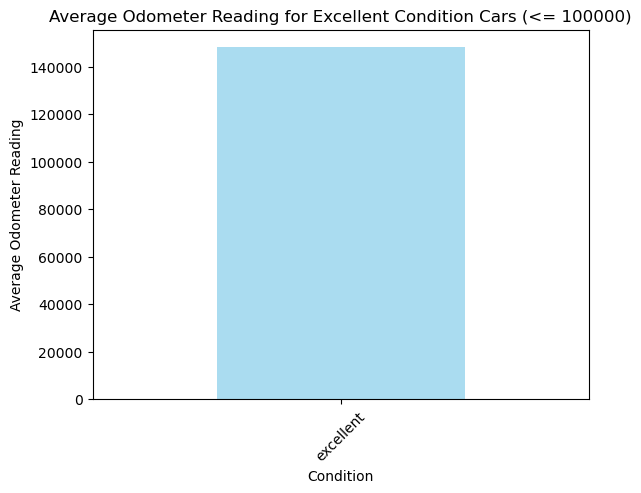

In [57]:
under_50 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)]

grouped = under_50.groupby('condition')['odometer'].mean()

# Step 3: Plot the bar chart
grouped.plot(kind='bar', alpha=0.7, color='skyblue')
plt.title('Average Odometer Reading for Excellent Condition Cars (<= 100000)')
plt.xlabel('Condition')
plt.ylabel('Average Odometer Reading')
plt.xticks(rotation=45)
plt.show()





price  model_year  model                condition  cylinders  fuel  odometer  transmission  type      paint_color  is_4wd  date_posted  days_listed
1      0.0         chevrolet silverado  excellent  8.0        gas   140582.0  automatic     truck     silver       0.0     2018-05-03   25             1
10995  2012.0      chrysler 300         excellent  6.0        gas   101669.0  automatic     sedan     black        0.0     2018-05-24   45             1
       2011.0      gmc acadia           excellent  6.0        gas   147919.0  automatic     SUV       Unkown       0.0     2018-11-17   12             1
                   gmc sierra 1500      excellent  8.0        gas   106000.0  automatic     truck     white        0.0     2019-04-18   22             1
                                                                    160708.0  automatic     pickup    Unkown       1.0     2018-06-16   7              1
                                                                                       

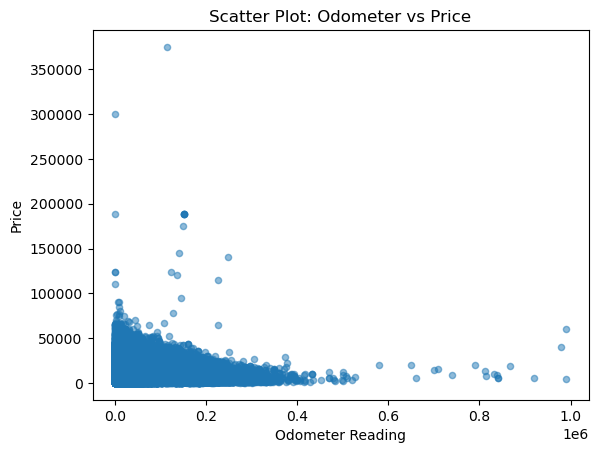

In [58]:
#the actual value count for excellent condition cars over 100k miles
cars_under100 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)].value_counts()

print(cars_under100)


# Create a scatter plot for 'odometer' vs 'price'
car_ad_df.plot(kind='scatter', x='odometer', y='price', alpha=0.5)

# Optional: Add titles and labels
plt.title('Scatter Plot: Odometer vs Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')

# Display the plot
plt.show()


Question 1.) How many cars over 100k miles are in excelllent condition? 
Answer: there are 4,096 cars that are over 100k miles & in excellent condition out of the 51,525 cars in our database.

Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?

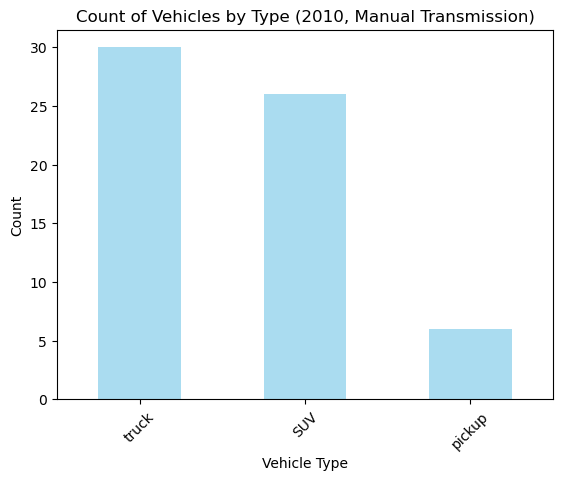

In [59]:
cars_q2 = car_ad_df[
    (car_ad_df['model_year'] == 2010) & 
    (car_ad_df['transmission'] == 'manual') & 
    (car_ad_df['type'].isin(['SUV', 'truck', 'pickup']))
]

type_counts = cars_q2['type'].value_counts()

# Plot a bar chart
type_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count of Vehicles by Type (2010, Manual Transmission)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
print(cars_q2.shape[0])

62


Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?
Answer: There are 62 cars in our database that fit this criteria. 

Question 3.) What's the average amount of days convertibles are listed? 


In [61]:
cars_q3 = car_ad_df[car_ad_df['type'] == 'convertible'] 
cars_q3_av = cars_q3['days_listed'].mean()

print(cars_q3_av)



39.19282511210762


Question 3.) What's the average amount of days convertibles are listed? 
Answer: Convertible cars are listed in the database for an average of 39 days. 

In [62]:
print(car_ad_df['price'].sample(5))

46643    25995
40888    14900
24705    17995
19007     7695
27286     8500
Name: price, dtype: int64


#Question 4 updated hypothesis 
Question 4.) 
Hypothesis 1: 'the average odometer value of cars in excellent condition and cars in like new and new condition are the same' 
Alternate Hypothesis : 'the average odomenter value of cars in excellent condition is less then cars in like new and new condition'

In [63]:



alpha = 0.05 



In [64]:
car_under_avr = under_50['odometer'].mean()
print(car_under_avr)

148227.88414851838


In [65]:
from scipy import stats as st
import numpy as np

In [66]:
#updated t-test approach from question 4 
#make 2 distint samples ; cars in excellent condition and cars in like new and new condition 

cars_ex_q4 = car_ad_df[
    (car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] )
]

cars_ln_q4 = car_ad_df[
    (car_ad_df['condition'].isin(['like new', 'new'])) & (car_ad_df['odometer'] )
]

from scipy.stats import ttest_ind

result = ttest_ind(
    cars_ex_q4['odometer'],  
    cars_ln_q4['odometer'],  
    alternative='less'       
)

print('t-statistic:', result.statistic)
print('p-value:', result.pvalue)
# Check the conclusion
if result.pvalue < 0.05:
    print("Reject the null hypothesis: The average odometer for 'excellent' is less than for 'like new' or 'excellent'.")
else:
    print("Fail to reject the null hypothesis.")

t-statistic: 29.073223621259988
p-value: 1.0
Fail to reject the null hypothesis.


#Question 4 updated hypothesis 
Question 4.) 
Hypothesis 1: 'the average odometer value of cars in excellent condition and cars in like new and new condition are the same' 
Alternate Hypothesis : 'the average odomenter value of cars in excellent condition is less then cars in like new and new condition'

Answer: We can't reject the hypothesis theres no evidence that cars in excellent condition average odometer value is less then cars in like new and new condition

In [67]:
print(cars_under100.head())

price  model_year  model                condition  cylinders  fuel  odometer  transmission  type    paint_color  is_4wd  date_posted  days_listed
1      0.0         chevrolet silverado  excellent  8.0        gas   140582.0  automatic     truck   silver       0.0     2018-05-03   25             1
10995  2012.0      chrysler 300         excellent  6.0        gas   101669.0  automatic     sedan   black        0.0     2018-05-24   45             1
       2011.0      gmc acadia           excellent  6.0        gas   147919.0  automatic     SUV     Unkown       0.0     2018-11-17   12             1
                   gmc sierra 1500      excellent  8.0        gas   106000.0  automatic     truck   white        0.0     2019-04-18   22             1
                                                                    160708.0  automatic     pickup  Unkown       1.0     2018-06-16   7              1
Name: count, dtype: int64


Question 4.) Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

Answer: We can't reject the null hypothesis: there is more cars under 100k miles in excellent condition.

In [68]:
##WebAppCode
### UPdated Code in The App.py File 


import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image

#############
# Page Title
############

image = Image.open('/Users/macos/Downloads/JOJO’s DEALER LIST.png')

st.markdown("""
#Our Car Dealership 
         a simple sda project on a car dealership
         
         
         """)

##################

df = pd.read_csv('/Users/macos/Downloads/vehicles_us.csv')
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

st.header('Data viewer')
show_manuf_1k_ads = st.checkbox('Include manufacturers with less than 1000 ads')
if not show_manuf_1k_ads:
    df = df.groupby('manufacturer').filter(lambda x: len(x) > 1000)

st.dataframe(df)
st.header('Vehicle types by manufacturer')
st.write(px.histogram(df, x='manufacturer', color='type'))
st.header('Histogram of `condition` vs `model_year`')

# -------------------------------------------------------
# histograms in plotly:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df[df['condition']=='good']['model_year'], name='good'))
# fig.add_trace(go.Histogram(x=df[df['condition']=='excellent']['model_year'], name='excellent'))
# fig.update_layout(barmode='stack')
# st.write(fig)
# works, but too many lines of code
# -------------------------------------------------------

# histograms in plotly_express:
st.write(px.histogram(df, x='model_year', color='condition'))
# a lot more concise!
# -------------------------------------------------------

st.header('Compare price distribution between manufacturers')
manufac_list = sorted(df['manufacturer'].unique())
manufacturer_1 = st.selectbox('Select manufacturer 1',
                              manufac_list, index=manufac_list.index('chevrolet'))

manufacturer_2 = st.selectbox('Select manufacturer 2',
                              manufac_list, index=manufac_list.index('hyundai'))
mask_filter = (df['manufacturer'] == manufacturer_1) | (df['manufacturer'] == manufacturer_2)
df_filtered = df[mask_filter]
normalize = st.checkbox('Normalize histogram', value=True)
if normalize:
    histnorm = 'percent'
else:
    histnorm = None
st.write(px.histogram(df_filtered,
                      x='price',
                      nbins=30,
                      color='manufacturer',
                      histnorm=histnorm,
                      barmode='overlay'))

########
#New Web App Function 
########
data_comp = {
    'model_year': df['model_year'],
    'odometer' : df['odometer']


}

df_comp = pd.DataFrame(data_comp)

# Streamlit App
st.header('Compare Vehicle Year to Mileage')


# Dropdown for selecting vehicle year
veh_list = sorted(df_comp['model_year'].unique())
selected_year = st.selectbox('Select vehicle year', veh_list)

# Filter the data for the selected year
filtered_df_comp = df_comp[df_comp['model_year'] == selected_year]

# Display filtered data
st.subheader(f"Vehicles from year {selected_year}")
st.write(filtered_df_comp)

# Categorize and display odometer readings
st.subheader("Mileage Categories")
for index, row in filtered_df_comp.iterrows():
    mileage = row['odometer']
    if mileage <= 10000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 10k**")
    elif mileage <= 35000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 35k**")
    elif mileage <= 50000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 50k**")
    elif mileage <= 75000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 75k**")  
    elif mileage <= 100000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 100k**")      
    else:
        st.write(f"Vehicle with mileage {mileage} miles: **Above 100k**")



###New Web Function###




# Streamlit App
st.title("Vehicle Database Analysis")

# Dropdown for selecting vehicle type
vehicle_types_ = df['type'].unique()
selected_type_ = st.selectbox("Select Vehicle Type", vehicle_types_, index=0)

# Filter the DataFrame based on the selected type
filtered_df_no = df[df['type'] == selected_type_]

# Display filtered data
st.subheader(f"Vehicles of type '{selected_type_}'")
st.write(filtered_df_no)

# Create a bar chart to display the count of vehicles for each model year
st.subheader("Vehicle Count by Model Year")
if not filtered_df_no.empty:
    vehicle_count = filtered_df_no['model_year'].value_counts().reset_index()
    vehicle_count.columns = ['model_year', 'count']

    # Plot using Plotly
    fig = px.bar(
        vehicle_count,
        x='model_year',
        y='count',
        title=f"Number of {selected_type_}s by Model Year",
        labels={'model_year': 'Model Year', 'count': 'Number of Vehicles'},
    )
    st.plotly_chart(fig)
else:
    st.write(f"No vehicles of type '{selected_type_}' found in the database.")

    


FileNotFoundError: [Errno 2] No such file or directory: '/Users/macos/Downloads/JOJO’s DEALER LIST.png'

In [ ]:
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
6    automatic   sedan       white     NaN  2018-12-27           73   
7    automatic     SUV       black     1.0  2019-01-07           68   

  manufacturer  
1         ford  
2      hyundai  
3         ford  
6       toyota  
7        honda  
